# 16장 랜덤 워크와 데이터 시각화

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/python4daml/blob/main/16장.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
import matplotlib.pyplot as plt

#선 두께
plt.rcParams['lines.linewidth'] = 4
#제목 폰트 크기
plt.rcParams['axes.titlesize'] = 16
#축 레이블 폰트 크기
plt.rcParams['axes.labelsize'] = 16
#x 축 텍스트 크기
plt.rcParams['xtick.labelsize'] = 16
#y 축 텍스트 크기
plt.rcParams['ytick.labelsize'] = 16
#x 축 눈금 크기
plt.rcParams['xtick.major.size'] = 7
#y 축 눈금 크기
plt.rcParams['ytick.major.size'] = 7
#마커 크기
plt.rcParams['lines.markersize'] = 10
#범례를 표시할 때 마커 표시 개수
plt.rcParams['legend.numpoints'] = 1
#범례 텍스트 크기
plt.rcParams['legend.fontsize'] = 14

## 16.1 랜덤 워크

## 16.2 술 취한 농부의 산책

그림 16-2 `Location`과 `Field` 클래스

In [2]:
class Location(object): 
    def __init__(self, x, y): 
        """x와 y는 숫자입니다""" 
        self._x, self._y = x, y 

    def move(self, delta_x, delta_y): 
        """delta_x와 delta_y는 숫자입니다""" 
        return Location(self._x + delta_x, self._y + delta_y) 

    def get_x(self): 
        return self._x 

    def get_y(self): 
        return self._y 

    def dist_from(self, other): 
        ox, oy = other._x, other._y 
        x_dist, y_dist = self._x -ox, self._y -oy 
        return (x_dist**2 + y_dist**2)**0.5 

    def __str__(self): 
        return f'<{self._x}, {self._y}>' 

class Field(object): 
    def __init__(self): 
        self._drunks = {} 

    def add_drunk(self, drunk, loc): 
        if drunk in self._drunks: 
            raise ValueError('Duplicate drunk') 
        else: 
            self._drunks[drunk] = loc 

    def move_drunk(self, drunk): 
        if drunk not in self._drunks: 
            raise ValueError('Drunk not in field') 
        x_dist, y_dist = drunk.take_step() 
        current_location = self._drunks[drunk] 
        #Location의 move 메서드를 사용하여 새로운 위치를 얻습니다
        self._drunks[drunk] = current_location.move(x_dist, y_dist) 

    def get_loc(self, drunk): 
        if drunk not in self._drunks: 
            raise ValueError('Drunk not in field') 
        return self._drunks[drunk] 

그림 16-3 `Drunk`와 `Usual_drunk` 클래스 

In [3]:
import random

class Drunk(object): 
    def __init__(self, name = None): 
        """name은 str이라고 가정합니다""" 
        self._name = name 

    def __str__(self): 
        if self != None: 
            return self._name 
        return 'Anonymous' 

class Usual_drunk(Drunk): 
    def take_step(self): 
        step_choices = [(0,1), (0,-1), (1, 0), (-1, 0)] 
        return random.choice(step_choices) 

그림 16-4 (버그가 있는) 술 취한 농부의 산책

In [4]:
def walk(f, d, num_steps): 
    """가정: f는 Field, d는 f에 있는 Drunk, num_steps는 int >= 0. 
       d를 num_steps만큼 이동합니다.
       처음 위치와 최종 위치 사이의 거리를 반환합니다""" 
    start = f.get_loc(d) 
    for s in range(num_steps): 
        f.move_drunk(d) 
    return start.dist_from(f.get_loc(d)) 

def sim_walks(num_steps, num_trials, d_class): 
    """num_steps은 int >= 0, num_trials은 int > 0, 
         d_class는 Drunk의 서브클래스라고 가정합니다.
       매번 num_steps 걸음만큼 num_trials 번 시뮬레이션합니다. 
       각각의 시뮬레이션 최종 위치의 목록을 반환합니다""" 
    Homer = d_class() 
    origin = Location(0, 0) 
    distances = [] 
    for t in range(num_trials): 
        f = Field() 
        f.add_drunk(Homer, origin) 
        distances.append(round(walk(f, Homer, num_trials), 1)) 
    return distances 

def drunk_test(walk_lengths, num_trials, d_class): 
    """walk_lengths는 ints >= 0의 시퀀스이고,
         num_trials은 int > 0, d_class Drunk의 서브클래스라고 가정합니다.
       walk_lengths에 있는 걸음 수마다, 
         num_trials 만큼 sim_walks을 실행하고 결과를 출력합니다""" 
    for num_steps in walk_lengths: 
        distances = sim_walks(num_steps, num_trials, d_class) 
        print(d_class.__name__, '걸음 수', num_steps, ': 평균 거리 =', 
              f'{sum(distances)/len(distances):.3f}, 최대 거리 =', 
              f'{max(distances)}, 최소 거리 = {min(distances)}') 

In [5]:
random.seed(0)
drunk_test((10, 100, 1000, 10000), 100, Usual_drunk)

Usual_drunk 걸음 수 10 : 평균 거리 = 8.634, 최대 거리 = 21.6, 최소 거리 = 1.4
Usual_drunk 걸음 수 100 : 평균 거리 = 8.570, 최대 거리 = 22.0, 최소 거리 = 0.0
Usual_drunk 걸음 수 1000 : 평균 거리 = 9.206, 최대 거리 = 21.6, 최소 거리 = 1.4
Usual_drunk 걸음 수 10000 : 평균 거리 = 8.727, 최대 거리 = 23.5, 최소 거리 = 1.4


In [6]:
random.seed(0)
drunk_test((0,1), 100, Usual_drunk)

Usual_drunk 걸음 수 0 : 평균 거리 = 8.634, 최대 거리 = 21.6, 최소 거리 = 1.4
Usual_drunk 걸음 수 1 : 평균 거리 = 8.570, 최대 거리 = 22.0, 최소 거리 = 0.0


In [7]:
def sim_walks(num_steps, num_trials, d_class): 
    """num_steps은 int >= 0, num_trials은 int > 0, 
         d_class는 Drunk의 서브클래스라고 가정합니다.
       매번 num_steps 걸음만큼 num_trials 번 시뮬레이션합니다. 
       각각의 시뮬레이션 최종 위치의 목록을 반환합니다""" 
    Homer = d_class() 
    origin = Location(0, 0) 
    distances = [] 
    for t in range(num_trials): 
        f = Field() 
        f.add_drunk(Homer, origin) 
        distances.append(round(walk(f, Homer, num_steps), 1)) 
    return distances 

In [8]:
random.seed(0)
drunk_test((0,1), 100, Usual_drunk)

Usual_drunk 걸음 수 0 : 평균 거리 = 0.000, 최대 거리 = 0.0, 최소 거리 = 0.0
Usual_drunk 걸음 수 1 : 평균 거리 = 1.000, 최대 거리 = 1.0, 최소 거리 = 1.0


In [9]:
random.seed(0)
drunk_test((10, 100, 1000, 10000), 100, Usual_drunk)

Usual_drunk 걸음 수 10 : 평균 거리 = 2.863, 최대 거리 = 7.2, 최소 거리 = 0.0
Usual_drunk 걸음 수 100 : 평균 거리 = 8.296, 최대 거리 = 21.6, 최소 거리 = 1.4
Usual_drunk 걸음 수 1000 : 평균 거리 = 27.297, 최대 거리 = 66.3, 최소 거리 = 4.2
Usual_drunk 걸음 수 10000 : 평균 거리 = 89.241, 최대 거리 = 226.5, 최소 거리 = 10.0


**손가락 운동**

In [10]:
x = []
y = []
for i in range(1, 6):
    x.append(10**i)
    distances = sim_walks(x[-1], 100, Usual_drunk)
    y.append(sum(distances)/len(distances))
print(x, y)

[10, 100, 1000, 10000, 100000] [2.6619999999999995, 8.866, 28.17, 84.67300000000002, 290.28599999999994]


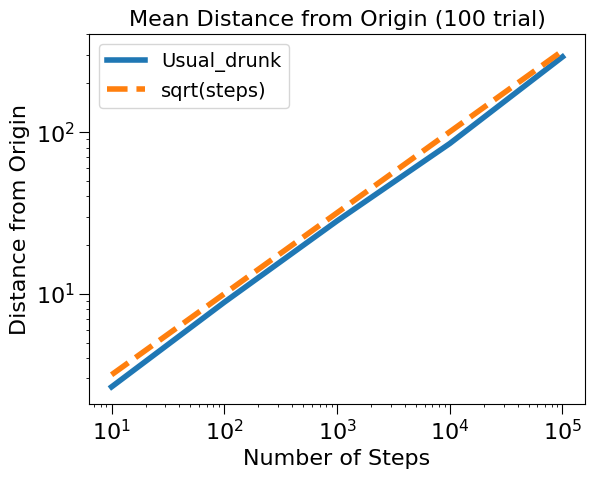

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x, y, label='Usual_drunk')
plt.plot(x, np.sqrt(x), '--', label='sqrt(steps)')
plt.xscale('log')
plt.yscale('log')
plt.title('Mean Distance from Origin (100 trial)')
plt.xlabel('Number of Steps')
plt.ylabel('Distance from Origin')
plt.legend()
plt.show()

## 16.3 편향된 랜덤 워크

그림 16-6 `Drunk`의 서브클래스

In [12]:
class Cold_drunk(Drunk): 
    def take_step(self): 
        step_choices = [(0.0,1.0), (0.0,-2.0), (1.0, 0.0), (-1.0, 0.0)] 
        return random.choice(step_choices) 

class EW_drunk(Drunk): 
    def take_step(self): 
        step_choices = [(1.0, 0.0), (-1.0, 0.0)] 
        return random.choice(step_choices) 

def sim_all(drunk_kinds, walk_lengths, num_trials): 
    for d_class in drunk_kinds: 
        drunk_test(walk_lengths, num_trials, d_class) 

In [13]:
random.seed(0)
sim_all((Usual_drunk, Cold_drunk, EW_drunk), (100, 1000), 10) 

Usual_drunk 걸음 수 100 : 평균 거리 = 9.640, 최대 거리 = 17.2, 최소 거리 = 4.2
Usual_drunk 걸음 수 1000 : 평균 거리 = 22.370, 최대 거리 = 45.5, 최소 거리 = 4.5
Cold_drunk 걸음 수 100 : 평균 거리 = 27.960, 최대 거리 = 51.2, 최소 거리 = 4.1
Cold_drunk 걸음 수 1000 : 평균 거리 = 259.490, 최대 거리 = 320.7, 최소 거리 = 215.1
EW_drunk 걸음 수 100 : 평균 거리 = 7.800, 최대 거리 = 16.0, 최소 거리 = 0.0
EW_drunk 걸음 수 1000 : 평균 거리 = 20.200, 최대 거리 = 48.0, 최소 거리 = 4.0


그림 16-7 스타일 순회하기

In [14]:
class style_iterator(object): 
    def __init__(self, styles): 
        self.index = 0 
        self.styles = styles 

    def next_style(self): 
        result = self.styles[self.index] 
        if self.index == len(self.styles) - 1: 
            self.index = 0 
        else: 
            self.index += 1 
        return result 

그림 16-8 여러 종류의 농부에 대한 그래프

In [15]:
def sim_drunk(num_trials, d_class, walk_lengths): 
    meanDistances = [] 
    for num_steps in walk_lengths: 
        print('시뮬레이션 시작:', num_steps, '걸음') 
        trials = sim_walks(num_steps, num_trials, d_class) 
        mean = sum(trials)/len(trials) 
        meanDistances.append(mean) 
    return meanDistances 

def sim_all_plot(drunk_kinds, walk_lengths, num_trials): 
    style_choice = style_iterator(('m-', 'r:', 'k-.')) 
    for d_class in drunk_kinds: 
        cur_style = style_choice.next_style() 
        print('시뮬레이션 클래스:', d_class.__name__) 
        means = sim_drunk(num_trials, d_class, walk_lengths) 
        plt.plot(walk_lengths, means, cur_style, 
                 label = d_class.__name__) 
    plt.title(f'Mean Distance from Origin ({num_trials} trials)') 
    plt.xlabel('Number of Steps') 
    plt.ylabel('Distance from Origin') 
    plt.legend(loc = 'best') 
    plt.semilogx() 
    plt.semilogy() 

시뮬레이션 클래스: Usual_drunk
시뮬레이션 시작: 10 걸음
시뮬레이션 시작: 100 걸음
시뮬레이션 시작: 1000 걸음
시뮬레이션 시작: 10000 걸음
시뮬레이션 시작: 100000 걸음
시뮬레이션 클래스: Cold_drunk
시뮬레이션 시작: 10 걸음
시뮬레이션 시작: 100 걸음
시뮬레이션 시작: 1000 걸음
시뮬레이션 시작: 10000 걸음
시뮬레이션 시작: 100000 걸음
시뮬레이션 클래스: EW_drunk
시뮬레이션 시작: 10 걸음
시뮬레이션 시작: 100 걸음
시뮬레이션 시작: 1000 걸음
시뮬레이션 시작: 10000 걸음
시뮬레이션 시작: 100000 걸음


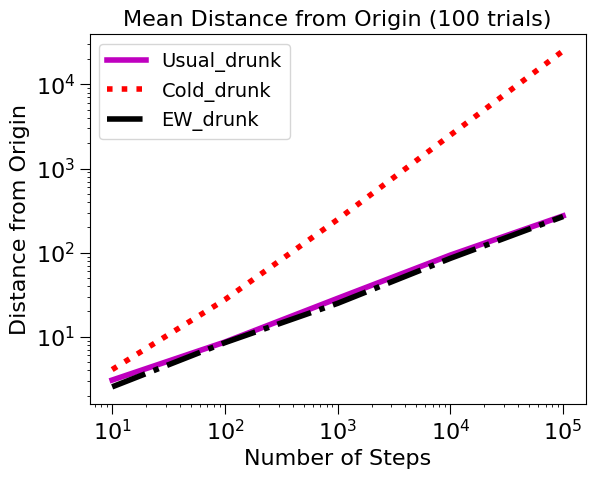

In [16]:
sim_all_plot((Usual_drunk, Cold_drunk, EW_drunk), 
             (10, 100, 1000, 10000, 100000), 100) 

그림 16-10 최종 위치 그리기

In [17]:
def get_final_locs(num_steps, num_trials, d_class): 
    locs = [] 
    d = d_class() 
    for t in range(num_trials): 
        f = Field() 
        f.add_drunk(d, Location(0, 0)) 
        for s in range(num_steps): 
            f.move_drunk(d) 
        locs.append(f.get_loc(d)) 
    return locs 

def plot_locs(drunk_kinds, num_steps, num_trials): 
    style_choice = style_iterator(('k+', 'r^', 'mo')) 
    for d_class in drunk_kinds: 
        locs = get_final_locs(num_steps, num_trials, d_class) 
        x_vals, y_vals = [], [] 
        for loc in locs: 
            x_vals.append(loc.get_x()) 
            y_vals.append(loc.get_y()) 
        meanX = sum(x_vals)/len(x_vals) 
        meanY = sum(y_vals)/len(y_vals) 
        cur_style = style_choice.next_style() 
        plt.plot(x_vals, y_vals, cur_style, 
                 label = (f'{d_class.__name__} mean loc. = <' + 
                          f'{meanX}, {meanY}>')) 
    plt.title(f'Location at End of Walks ({num_steps} steps)') 
    plt.xlabel('Steps East/West of Origin') 
    plt.ylabel('Steps North/South of Origin') 
    plt.legend(loc = 'best') 

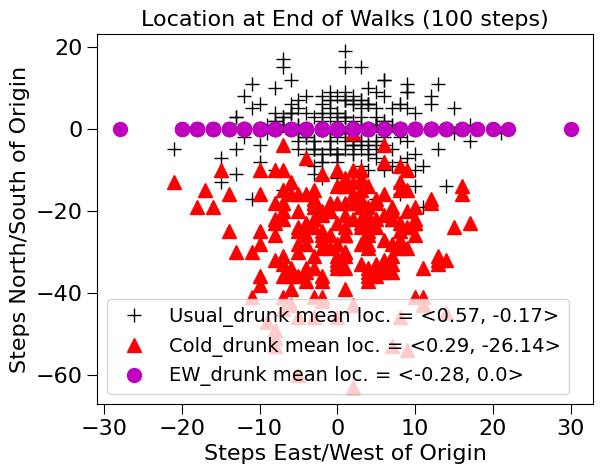

In [18]:
random.seed(0)
plot_locs((Usual_drunk, Cold_drunk, EW_drunk), 100, 200)

그림 16-12 걸음 추적하기

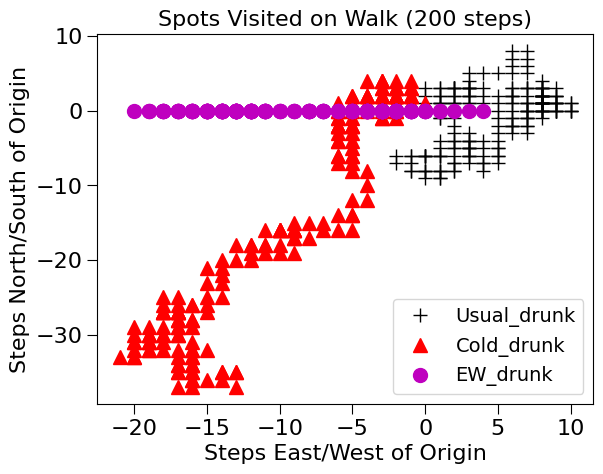

In [19]:
def trace_walk(drunk_kinds, num_steps): 
    style_choice = style_iterator(('k+', 'r^', 'mo')) 
    f = Field() 
    for d_class in drunk_kinds: 
        d = d_class() 
        f.add_drunk(d, Location(0, 0)) 
        locs = [] 
        for s in range(num_steps): 
            f.move_drunk(d) 
            locs.append(f.get_loc(d)) 
        x_vals, y_vals = [], [] 
        for loc in locs: 
            x_vals.append(loc.get_x()) 
            y_vals.append(loc.get_y()) 
        cur_style = style_choice.next_style() 
        plt.plot(x_vals, y_vals, cur_style, 
                 label = d_class.__name__) 
    plt.title('Spots Visited on Walk (' 
              + str(num_steps) + ' steps)') 
    plt.xlabel('Steps East/West of Origin') 
    plt.ylabel('Steps North/South of Origin') 
    plt.legend(loc = 'best') 

random.seed(2)
trace_walk((Usual_drunk, Cold_drunk, EW_drunk), 200) 

## 16.4 위험한 들판

그림 16-14 이상한 현상이 있는 들판

In [20]:
class Odd_field(Field): 
    def __init__(self, numHoles, x_range, y_range): 
        Field.__init__(self) 
        self.wormholes = {} 
        for w in range(numHoles): 
            x = random.randint(-x_range, x_range) 
            y = random.randint(-y_range, y_range) 
            newX = random.randint(-x_range, x_range) 
            newY = random.randint(-y_range, y_range) 
            newLoc = Location(newX, newY) 
            self.wormholes[(x, y)] = newLoc 

    def move_drunk(self, drunk): 
        Field.move_drunk(self, drunk) 
        x = self._drunks[drunk].get_x() 
        y = self._drunks[drunk].get_y() 
        if (x, y) in self.wormholes: 
            self._drunks[drunk] = self.wormholes[(x, y)] 

In [21]:
def trace_walk(drunk_kinds, num_steps): 
    style_choice = style_iterator(('k+', 'r^', 'mo')) 
    f = Odd_field(1000, 100, 200) 
    for d_class in drunk_kinds: 
        d = d_class() 
        f.add_drunk(d, Location(0, 0)) 
        locs = [] 
        for s in range(num_steps): 
            f.move_drunk(d) 
            locs.append(f.get_loc(d)) 
        x_vals, y_vals = [], [] 
        for loc in locs: 
            x_vals.append(loc.get_x()) 
            y_vals.append(loc.get_y()) 
        cur_style = style_choice.next_style() 
        plt.plot(x_vals, y_vals, cur_style, 
                 label = d_class.__name__) 
    plt.title('Spots Visited on Walk (' 
              + str(num_steps) + ' steps)') 
    plt.xlabel('Steps East/West of Origin') 
    plt.ylabel('Steps North/South of Origin') 
    plt.legend(loc = 'best') 

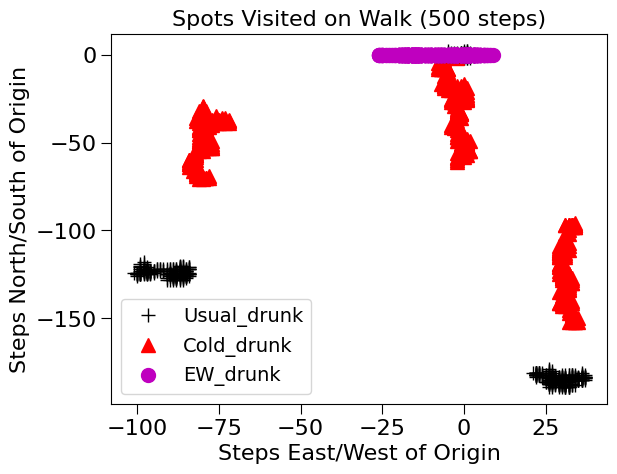

In [22]:
random.seed(0)
trace_walk((Usual_drunk, Cold_drunk, EW_drunk), 500)